In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

main = pd.read_csv('responses2.csv')
main.head()

,Unnamed: 0,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,Male,22,Senior,College of Engineering,16,31-40,7,8,0,...,6,1,1,2,1,2,2,1,1,1
1,1,Male,21,Junior,College of Engineering,17,<10,4,6,0,...,8,3,2,3,3,2,1,1,1,3
2,2,Male,21,Junior,College of Engineering,12,10-20,8,8,Club,...,8,1,2,2,3,1,1,1,0,2
3,3,Prefer not to say,20,Senior,College of Engineering,12,21-30,8,5,Job,...,7,1,0,1,1,2,2,0,1,2
4,4,Male,21,Junior,College of Engineering,17,41-50,4,8,Both,...,9,1,2,3,3,3,3,3,3,3


In [2]:
from sklearn.model_selection import train_test_split

target_column = 'Overall_Stress' 
X = main.drop(columns=[target_column]) 
y = main[target_column]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (50, 27), X_test shape: (13, 27)
y_train shape: (50,), y_test shape: (13,)


In [3]:
main.loc[main['Sex'] == 'Male', 'Sex'] = 0
main.loc[main['Sex'] == 'Female', 'Sex'] = 1
main.head()

,Unnamed: 0,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,0,22,Senior,College of Engineering,16,31-40,7,8,0,...,6,1,1,2,1,2,2,1,1,1
1,1,0,21,Junior,College of Engineering,17,<10,4,6,0,...,8,3,2,3,3,2,1,1,1,3
2,2,0,21,Junior,College of Engineering,12,10-20,8,8,Club,...,8,1,2,2,3,1,1,1,0,2
3,3,Prefer not to say,20,Senior,College of Engineering,12,21-30,8,5,Job,...,7,1,0,1,1,2,2,0,1,2
4,4,0,21,Junior,College of Engineering,17,41-50,4,8,Both,...,9,1,2,3,3,3,3,3,3,3


In [4]:
main['Major'].value_counts()

Major
College of Letters and Science                        28
College of Engineering                                17
College of Biological Sciences                        12
College of Agricultural and Environmental Sciences     4
Double Major                                           2
Name: count, dtype: int64

In [5]:
main.loc[main['Major'] == 'College of Letters and Science', 'Major'] = 0
main.loc[main['Major'] == 'College of Engineering', 'Major'] = 1
main.loc[main['Major'] == 'College of Biological Sciences', 'Major'] = 2
main.loc[main['Major'] == 'College of Agricultural and Environmental Sciences', 'Major'] = 3
main.loc[main['Major'] == 'Double Major', 'Major'] = 4
main.head()

,Unnamed: 0,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,0,22,Senior,1,16,31-40,7,8,0,...,6,1,1,2,1,2,2,1,1,1
1,1,0,21,Junior,1,17,<10,4,6,0,...,8,3,2,3,3,2,1,1,1,3
2,2,0,21,Junior,1,12,10-20,8,8,Club,...,8,1,2,2,3,1,1,1,0,2
3,3,Prefer not to say,20,Senior,1,12,21-30,8,5,Job,...,7,1,0,1,1,2,2,0,1,2
4,4,0,21,Junior,1,17,41-50,4,8,Both,...,9,1,2,3,3,3,3,3,3,3


In [6]:
main['Sex'].value_counts()

Sex
1                    35
0                    26
Prefer not to say     2
Name: count, dtype: int64

In [7]:
main.loc[main['Sex'] == 'Prefer not to say', 'Sex'] = 2
main.head()

,Unnamed: 0,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,0,22,Senior,1,16,31-40,7,8,0,...,6,1,1,2,1,2,2,1,1,1
1,1,0,21,Junior,1,17,<10,4,6,0,...,8,3,2,3,3,2,1,1,1,3
2,2,0,21,Junior,1,12,10-20,8,8,Club,...,8,1,2,2,3,1,1,1,0,2
3,3,2,20,Senior,1,12,21-30,8,5,Job,...,7,1,0,1,1,2,2,0,1,2
4,4,0,21,Junior,1,17,41-50,4,8,Both,...,9,1,2,3,3,3,3,3,3,3


In [8]:
main['Major'].value_counts()

Major
0    28
1    17
2    12
3     4
4     2
Name: count, dtype: int64

In [9]:
main['Year'].value_counts()

Year
Senior              38
Junior              21
Sophomore            2
Freshman             1
Graduate Student     1
Name: count, dtype: int64

In [10]:
main.loc[main['Year'] == 'Senior', 'Year'] = 0
main.loc[main['Year'] == 'Junior', 'Year'] = 1
main.loc[main['Year'] == 'Sophomore', 'Year'] = 2
main.loc[main['Year'] == 'Freshman', 'Year'] = 3
main.loc[main['Year'] == 'Graduate Student', 'Year'] = 4
main.head()

,Unnamed: 0,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,0,22,0,1,16,31-40,7,8,0,...,6,1,1,2,1,2,2,1,1,1
1,1,0,21,1,1,17,<10,4,6,0,...,8,3,2,3,3,2,1,1,1,3
2,2,0,21,1,1,12,10-20,8,8,Club,...,8,1,2,2,3,1,1,1,0,2
3,3,2,20,0,1,12,21-30,8,5,Job,...,7,1,0,1,1,2,2,0,1,2
4,4,0,21,1,1,17,41-50,4,8,Both,...,9,1,2,3,3,3,3,3,3,3


In [11]:
main['Year'].value_counts()

Year
0    38
1    21
2     2
3     1
4     1
Name: count, dtype: int64

In [12]:
main['Units'].value_counts()

Units
12    20
16    15
17     6
13     6
14     5
18     3
22     2
19     2
8      1
20     1
27     1
15     1
Name: count, dtype: int64

In [13]:
main['Academic_Hours'].value_counts()

Academic_Hours
10-20    20
21-30    19
31-40    10
<10       5
41-50     5
>60       4
Name: count, dtype: int64

In [14]:
main.loc[main['Academic_Hours'] == '10-20', 'Academic_Hours'] = 0
main.loc[main['Academic_Hours'] == '21-30', 'Academic_Hours'] = 1
main.loc[main['Academic_Hours'] == '31-40', 'Academic_Hours'] = 2
main.loc[main['Academic_Hours'] == '<10', 'Academic_Hours'] = 3
main.loc[main['Academic_Hours'] == '41-50', 'Academic_Hours'] = 4
main.loc[main['Academic_Hours'] == '>60', 'Academic_Hours'] = 5
main.head()

,Unnamed: 0,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,0,22,0,1,16,2,7,8,0,...,6,1,1,2,1,2,2,1,1,1
1,1,0,21,1,1,17,3,4,6,0,...,8,3,2,3,3,2,1,1,1,3
2,2,0,21,1,1,12,0,8,8,Club,...,8,1,2,2,3,1,1,1,0,2
3,3,2,20,0,1,12,1,8,5,Job,...,7,1,0,1,1,2,2,0,1,2
4,4,0,21,1,1,17,4,4,8,Both,...,9,1,2,3,3,3,3,3,3,3


In [15]:
main['Position'].value_counts()

Position
Job     23
Club    14
0       13
Both    13
Name: count, dtype: int64

In [16]:
main.loc[main['Position'] == 'Job', 'Position'] = 0
main.loc[main['Position'] == 'Club', 'Position'] = 1
main.loc[main['Position'] == '0', 'Position'] = 2
main.loc[main['Position'] == 'Both', 'Position'] = 3
main.head()

,Unnamed: 0,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,0,22,0,1,16,2,7,8,2,...,6,1,1,2,1,2,2,1,1,1
1,1,0,21,1,1,17,3,4,6,2,...,8,3,2,3,3,2,1,1,1,3
2,2,0,21,1,1,12,0,8,8,1,...,8,1,2,2,3,1,1,1,0,2
3,3,2,20,0,1,12,1,8,5,0,...,7,1,0,1,1,2,2,0,1,2
4,4,0,21,1,1,17,4,4,8,3,...,9,1,2,3,3,3,3,3,3,3


In [17]:
main['Position'].value_counts()

Position
0    23
1    14
2    13
3    13
Name: count, dtype: int64

In [18]:
main['Job_Club_Hours'].value_counts()

Job_Club_Hours
6-10     16
1-5      13
0        12
16-20    10
11-15     7
20+       5
Name: count, dtype: int64

In [19]:
main.loc[main['Job_Club_Hours'] == '6-10', 'Job_Club_Hours'] = 0
main.loc[main['Job_Club_Hours'] == '1-5', 'Job_Club_Hours'] = 1
main.loc[main['Job_Club_Hours'] == '0', 'Job_Club_Hours'] = 2
main.loc[main['Job_Club_Hours'] == '16-20', 'Job_Club_Hours'] = 3
main.loc[main['Job_Club_Hours'] == '11-15', 'Job_Club_Hours'] = 4
main.loc[main['Job_Club_Hours'] == '20+', 'Job_Club_Hours'] = 5
main.head()

,Unnamed: 0,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,0,22,0,1,16,2,7,8,2,...,6,1,1,2,1,2,2,1,1,1
1,1,0,21,1,1,17,3,4,6,2,...,8,3,2,3,3,2,1,1,1,3
2,2,0,21,1,1,12,0,8,8,1,...,8,1,2,2,3,1,1,1,0,2
3,3,2,20,0,1,12,1,8,5,0,...,7,1,0,1,1,2,2,0,1,2
4,4,0,21,1,1,17,4,4,8,3,...,9,1,2,3,3,3,3,3,3,3


In [20]:
main['Job_Club_Hours'].value_counts()

Job_Club_Hours
0    16
1    13
2    12
3    10
4     7
5     5
Name: count, dtype: int64

In [21]:
main.head()

,Unnamed: 0,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,0,22,0,1,16,2,7,8,2,...,6,1,1,2,1,2,2,1,1,1
1,1,0,21,1,1,17,3,4,6,2,...,8,3,2,3,3,2,1,1,1,3
2,2,0,21,1,1,12,0,8,8,1,...,8,1,2,2,3,1,1,1,0,2
3,3,2,20,0,1,12,1,8,5,0,...,7,1,0,1,1,2,2,0,1,2
4,4,0,21,1,1,17,4,4,8,3,...,9,1,2,3,3,3,3,3,3,3


In [22]:
main['Socializing_Hours'].value_counts()

Socializing_Hours
6-10     24
1-5      23
11-15     6
0         4
16-20     4
25-30     2
Name: count, dtype: int64

In [23]:
main.loc[main['Socializing_Hours'] == '6-10', 'Socializing_Hours'] = 0
main.loc[main['Socializing_Hours'] == '1-5', 'Socializing_Hours'] = 1
main.loc[main['Socializing_Hours'] == '11-15', 'Socializing_Hours'] = 2
main.loc[main['Socializing_Hours'] == '0', 'Socializing_Hours'] = 3
main.loc[main['Socializing_Hours'] == '16-20', 'Socializing_Hours'] = 4
main.loc[main['Socializing_Hours'] == '25-30', 'Socializing_Hours'] = 5
main.head()

,Unnamed: 0,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,0,22,0,1,16,2,7,8,2,...,6,1,1,2,1,2,2,1,1,1
1,1,0,21,1,1,17,3,4,6,2,...,8,3,2,3,3,2,1,1,1,3
2,2,0,21,1,1,12,0,8,8,1,...,8,1,2,2,3,1,1,1,0,2
3,3,2,20,0,1,12,1,8,5,0,...,7,1,0,1,1,2,2,0,1,2
4,4,0,21,1,1,17,4,4,8,3,...,9,1,2,3,3,3,3,3,3,3


In [24]:
main['Socializing_Hours'].value_counts()

Socializing_Hours
0    24
1    23
2     6
3     4
4     4
5     2
Name: count, dtype: int64

In [25]:
main.isnull().sum()
main = main.dropna()

main_data = main[['Sex', 'Age', 'Year', 'Major',
       'Units', 'Academic_Hours', 'Academic_Satisfication',
       'Academic_Stress', 'Position',
       'Job_Club_Hours', 'Job_Club_Satisfaction', 'Job_Club_Stress',
       'Sleep_Hours', 'Active_Level', 'Diet_Level', 'Socializing_Hours', 'Financial_Presssure', 
        'Overall_Stress', 'Anxiety_freq', 'Excitement_freq', 'Stress_freq', 'Tiredness_Fatigue_freq', 
        'Unmotived_freq', 'Meaningless_freq', 'Helpless_freq', 'Lonely_freq', 'Overwhelmed_freq']]
main_data.head()

,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,Job_Club_Hours,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,22,0,1,16,2,7,8,2,2,...,6,1,1,2,1,2,2,1,1,1
1,0,21,1,1,17,3,4,6,2,2,...,8,3,2,3,3,2,1,1,1,3
2,0,21,1,1,12,0,8,8,1,1,...,8,1,2,2,3,1,1,1,0,2
3,2,20,0,1,12,1,8,5,0,3,...,7,1,0,1,1,2,2,0,1,2
4,0,21,1,1,17,4,4,8,3,4,...,9,1,2,3,3,3,3,3,3,3


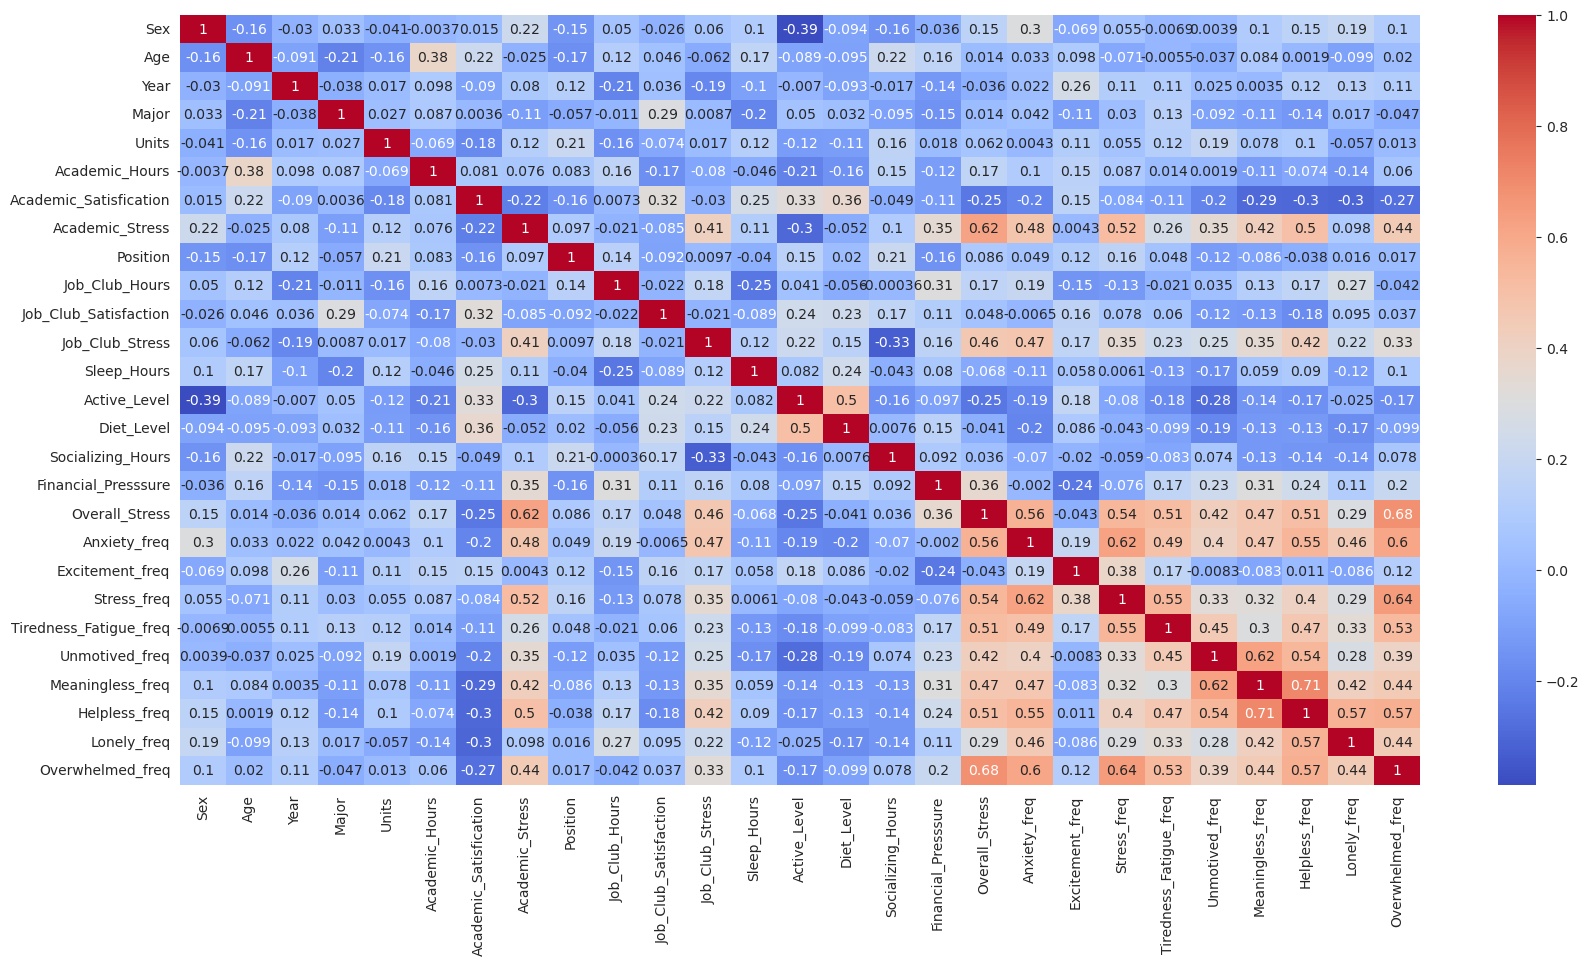

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(main_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [27]:
print(main.dtypes)
print(main.head()) 

Unnamed: 0                 int64
Sex                       object
Age                        int64
Year                      object
Major                     object
Units                      int64
Academic_Hours            object
Academic_Satisfication     int64
Academic_Stress            int64
Position                  object
Job_Club_Hours            object
Job_Club_Satisfaction      int64
Job_Club_Stress            int64
Sleep_Hours                int64
Active_Level               int64
Diet_Level                 int64
Socializing_Hours         object
Financial_Presssure        int64
Overall_Stress             int64
Anxiety_freq               int64
Excitement_freq            int64
Stress_freq                int64
Tiredness_Fatigue_freq     int64
Unmotived_freq             int64
Meaningless_freq           int64
Helpless_freq              int64
Lonely_freq                int64
Overwhelmed_freq           int64
dtype: object
   Unnamed: 0 Sex  Age Year Major  Units Academic_Hours  \
0  

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
main_scaled = scaler.fit_transform(main) 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(main_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.07692307692307693


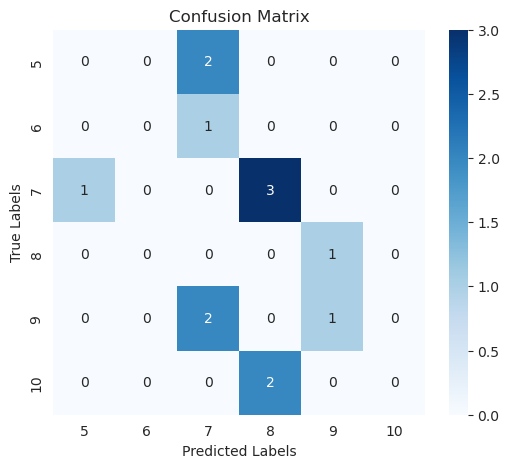

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [31]:
numeric_columns = main.select_dtypes(['int', 'float']).columns
numeric_columns

Index(['Unnamed: 0', 'Age', 'Units', 'Academic_Satisfication',
       'Academic_Stress', 'Job_Club_Satisfaction', 'Job_Club_Stress',
       'Sleep_Hours', 'Active_Level', 'Diet_Level', 'Financial_Presssure',
       'Overall_Stress', 'Anxiety_freq', 'Excitement_freq', 'Stress_freq',
       'Tiredness_Fatigue_freq', 'Unmotived_freq', 'Meaningless_freq',
       'Helpless_freq', 'Lonely_freq', 'Overwhelmed_freq'],
      dtype='object')

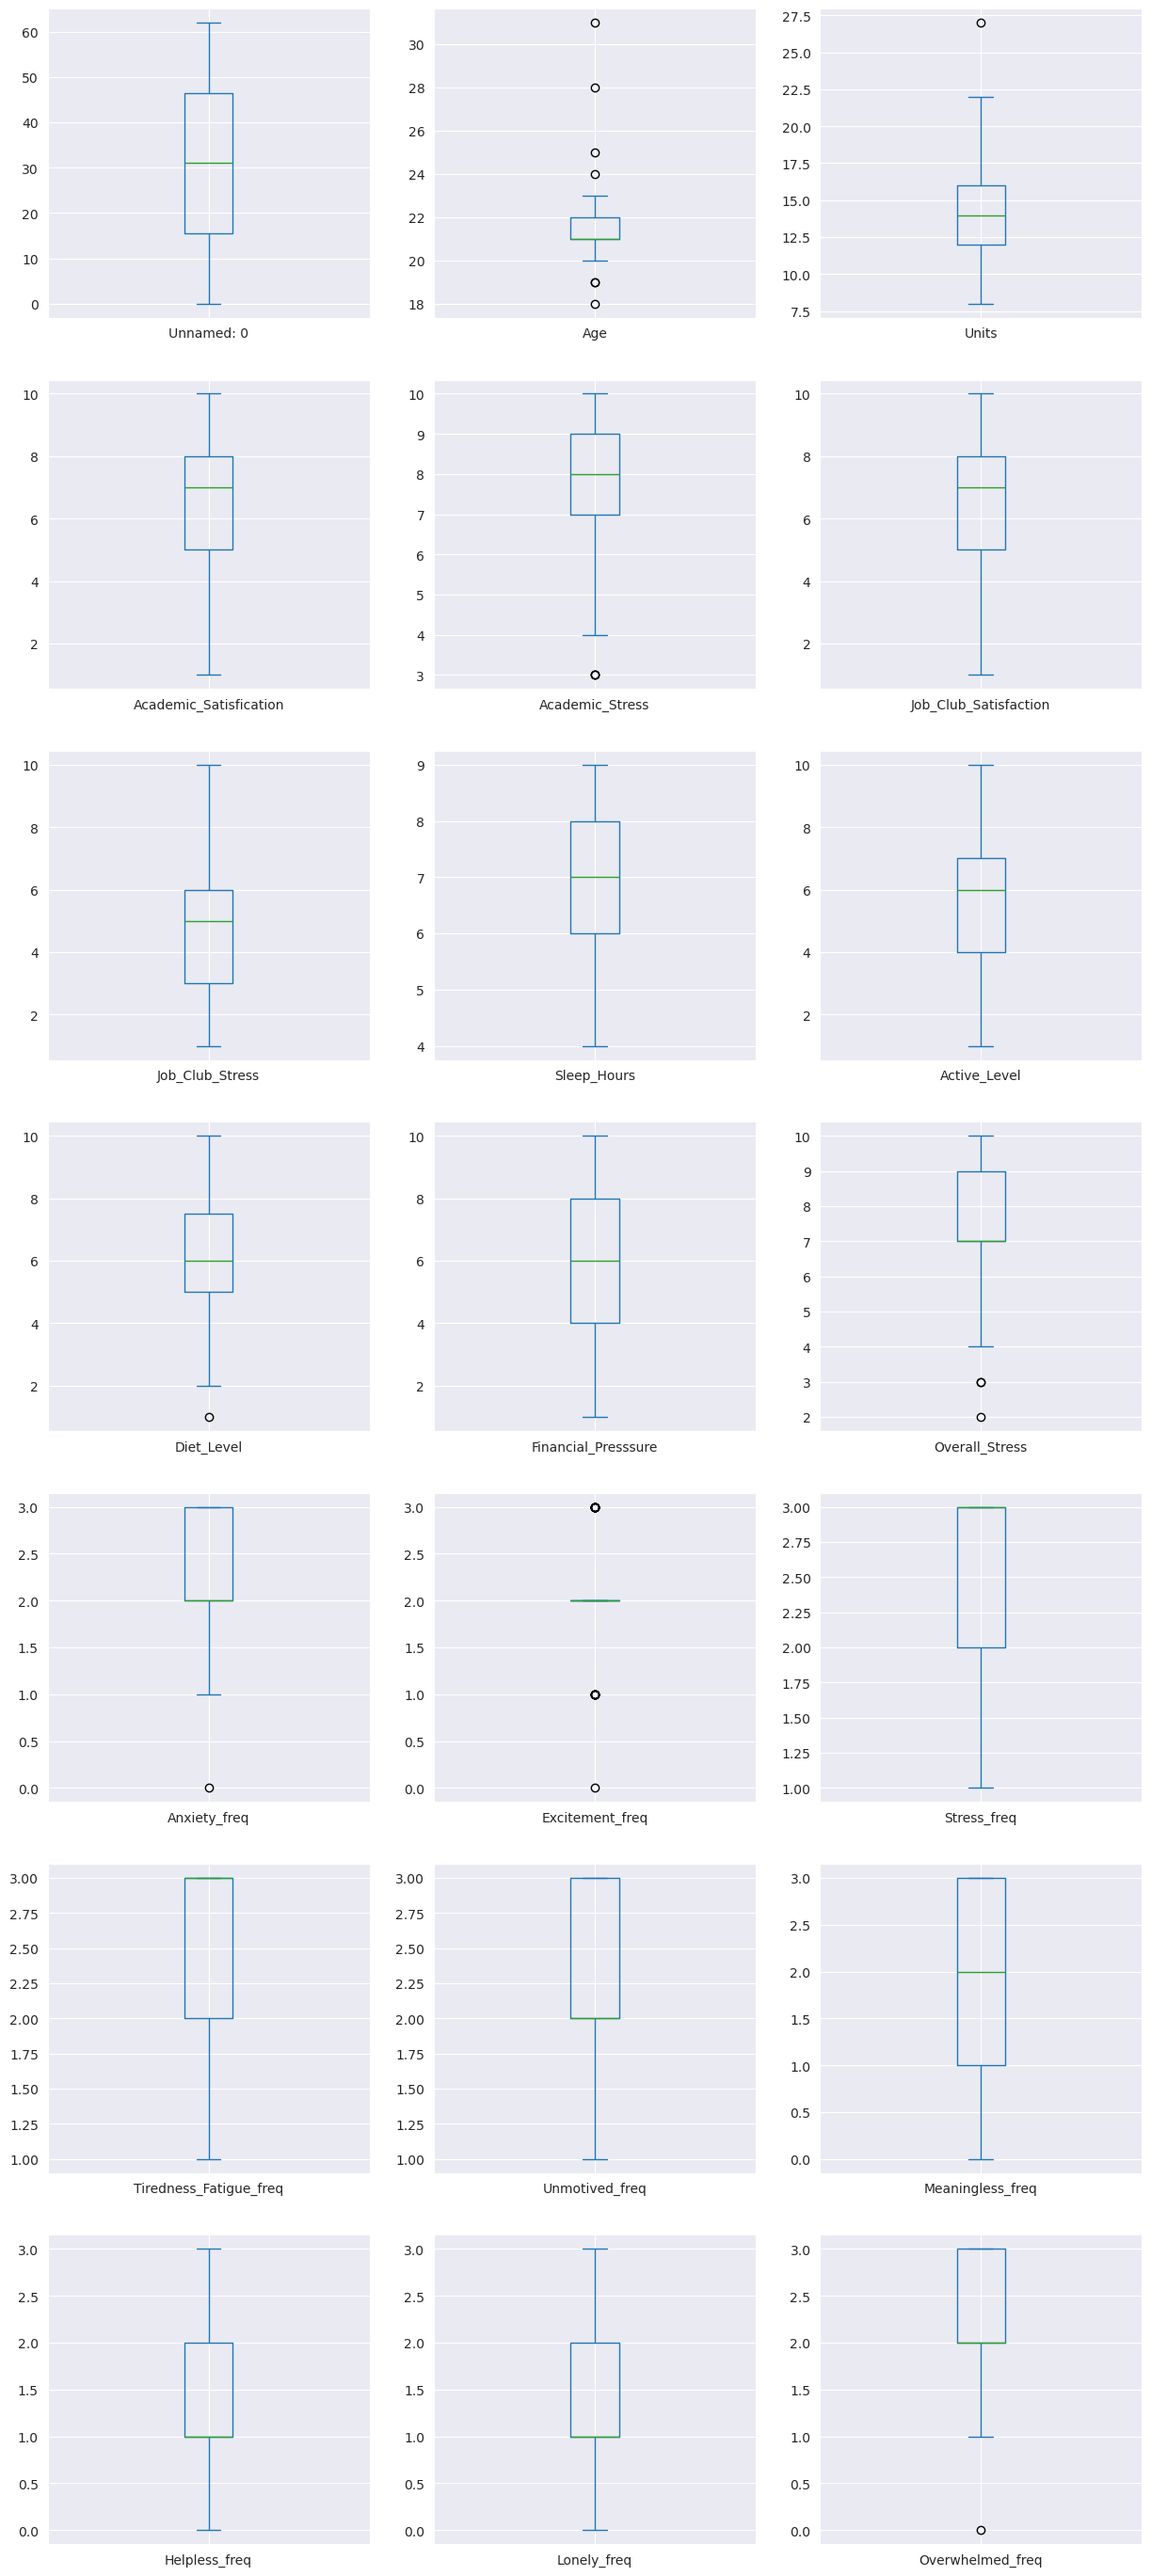

In [32]:
import math
numeric_columns = main.select_dtypes(include=['number']).columns
num_plots = len(numeric_columns)

rows = math.ceil(num_plots / 3)  
cols = min(3, num_plots) 

main[numeric_columns].plot(subplots=True, kind='box', layout=(rows, cols), figsize=(15, rows * 5))
plt.show()

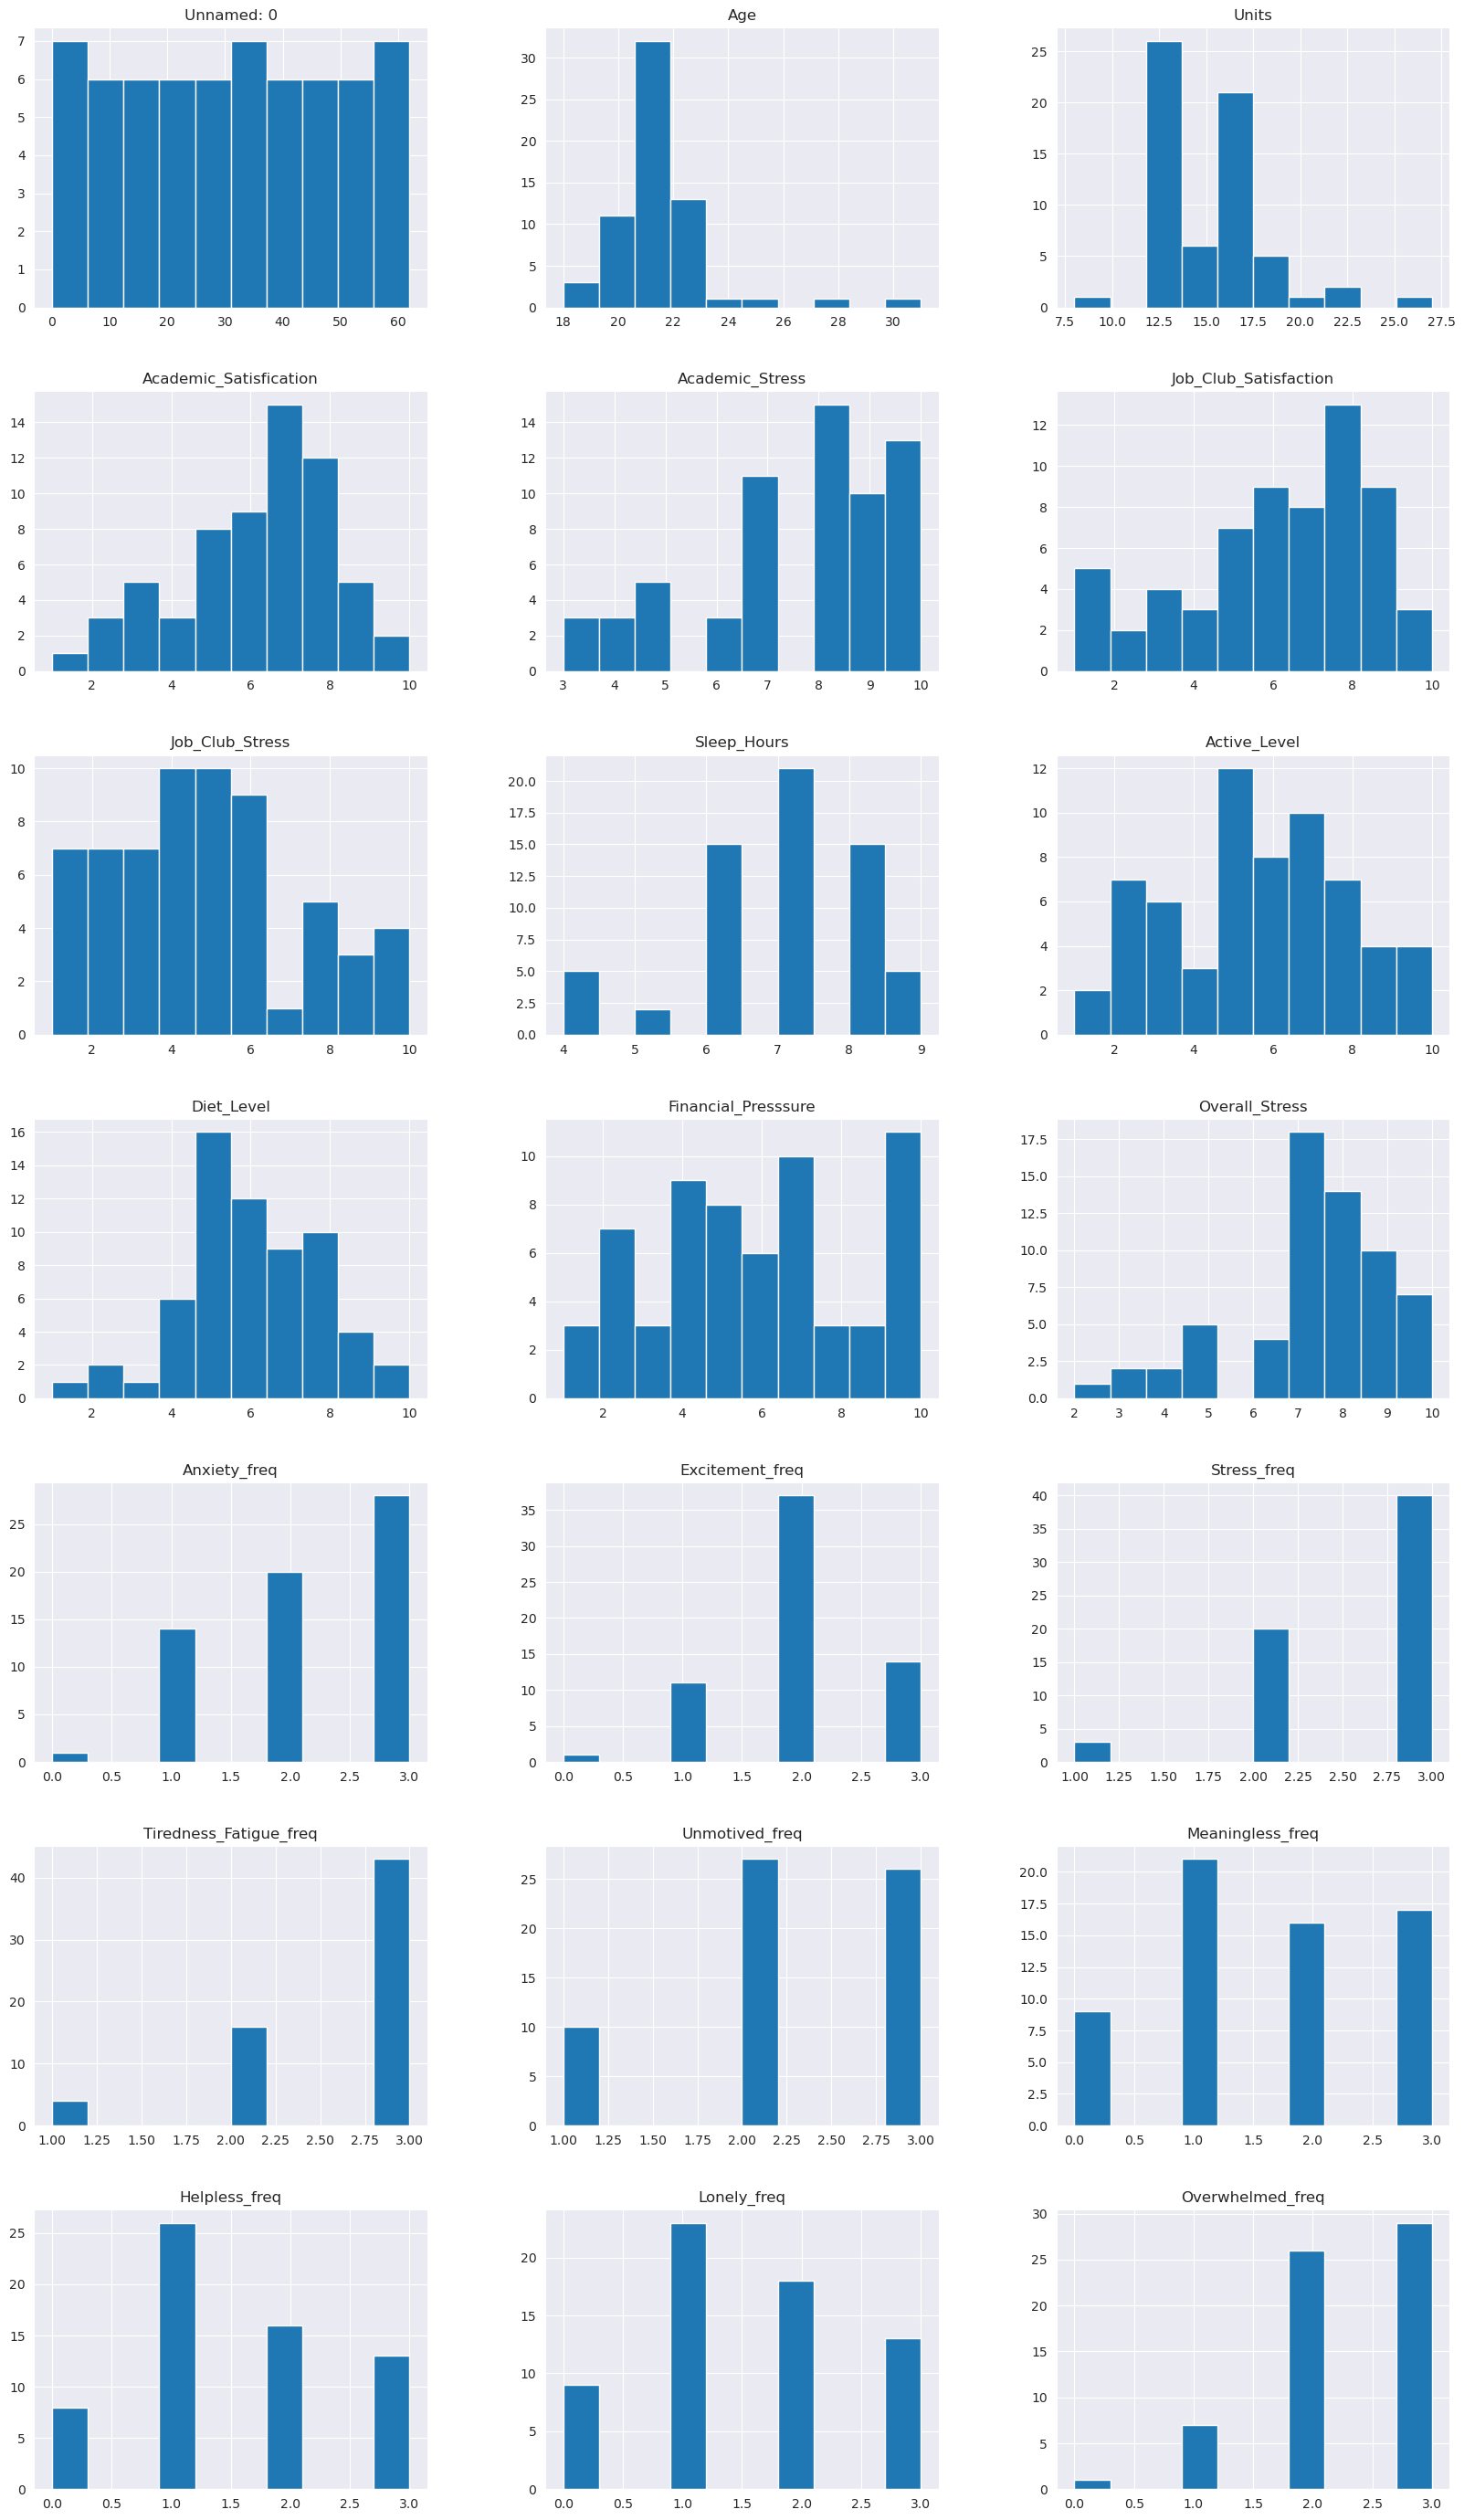

In [33]:
import math

numeric_columns = main.select_dtypes(include=['number']).columns
num_plots = len(numeric_columns)

rows = math.ceil(num_plots / 3) 
cols = min(3, num_plots) 

main.hist(figsize=(20, rows * 5), layout=(rows, cols), column=numeric_columns)
plt.show()

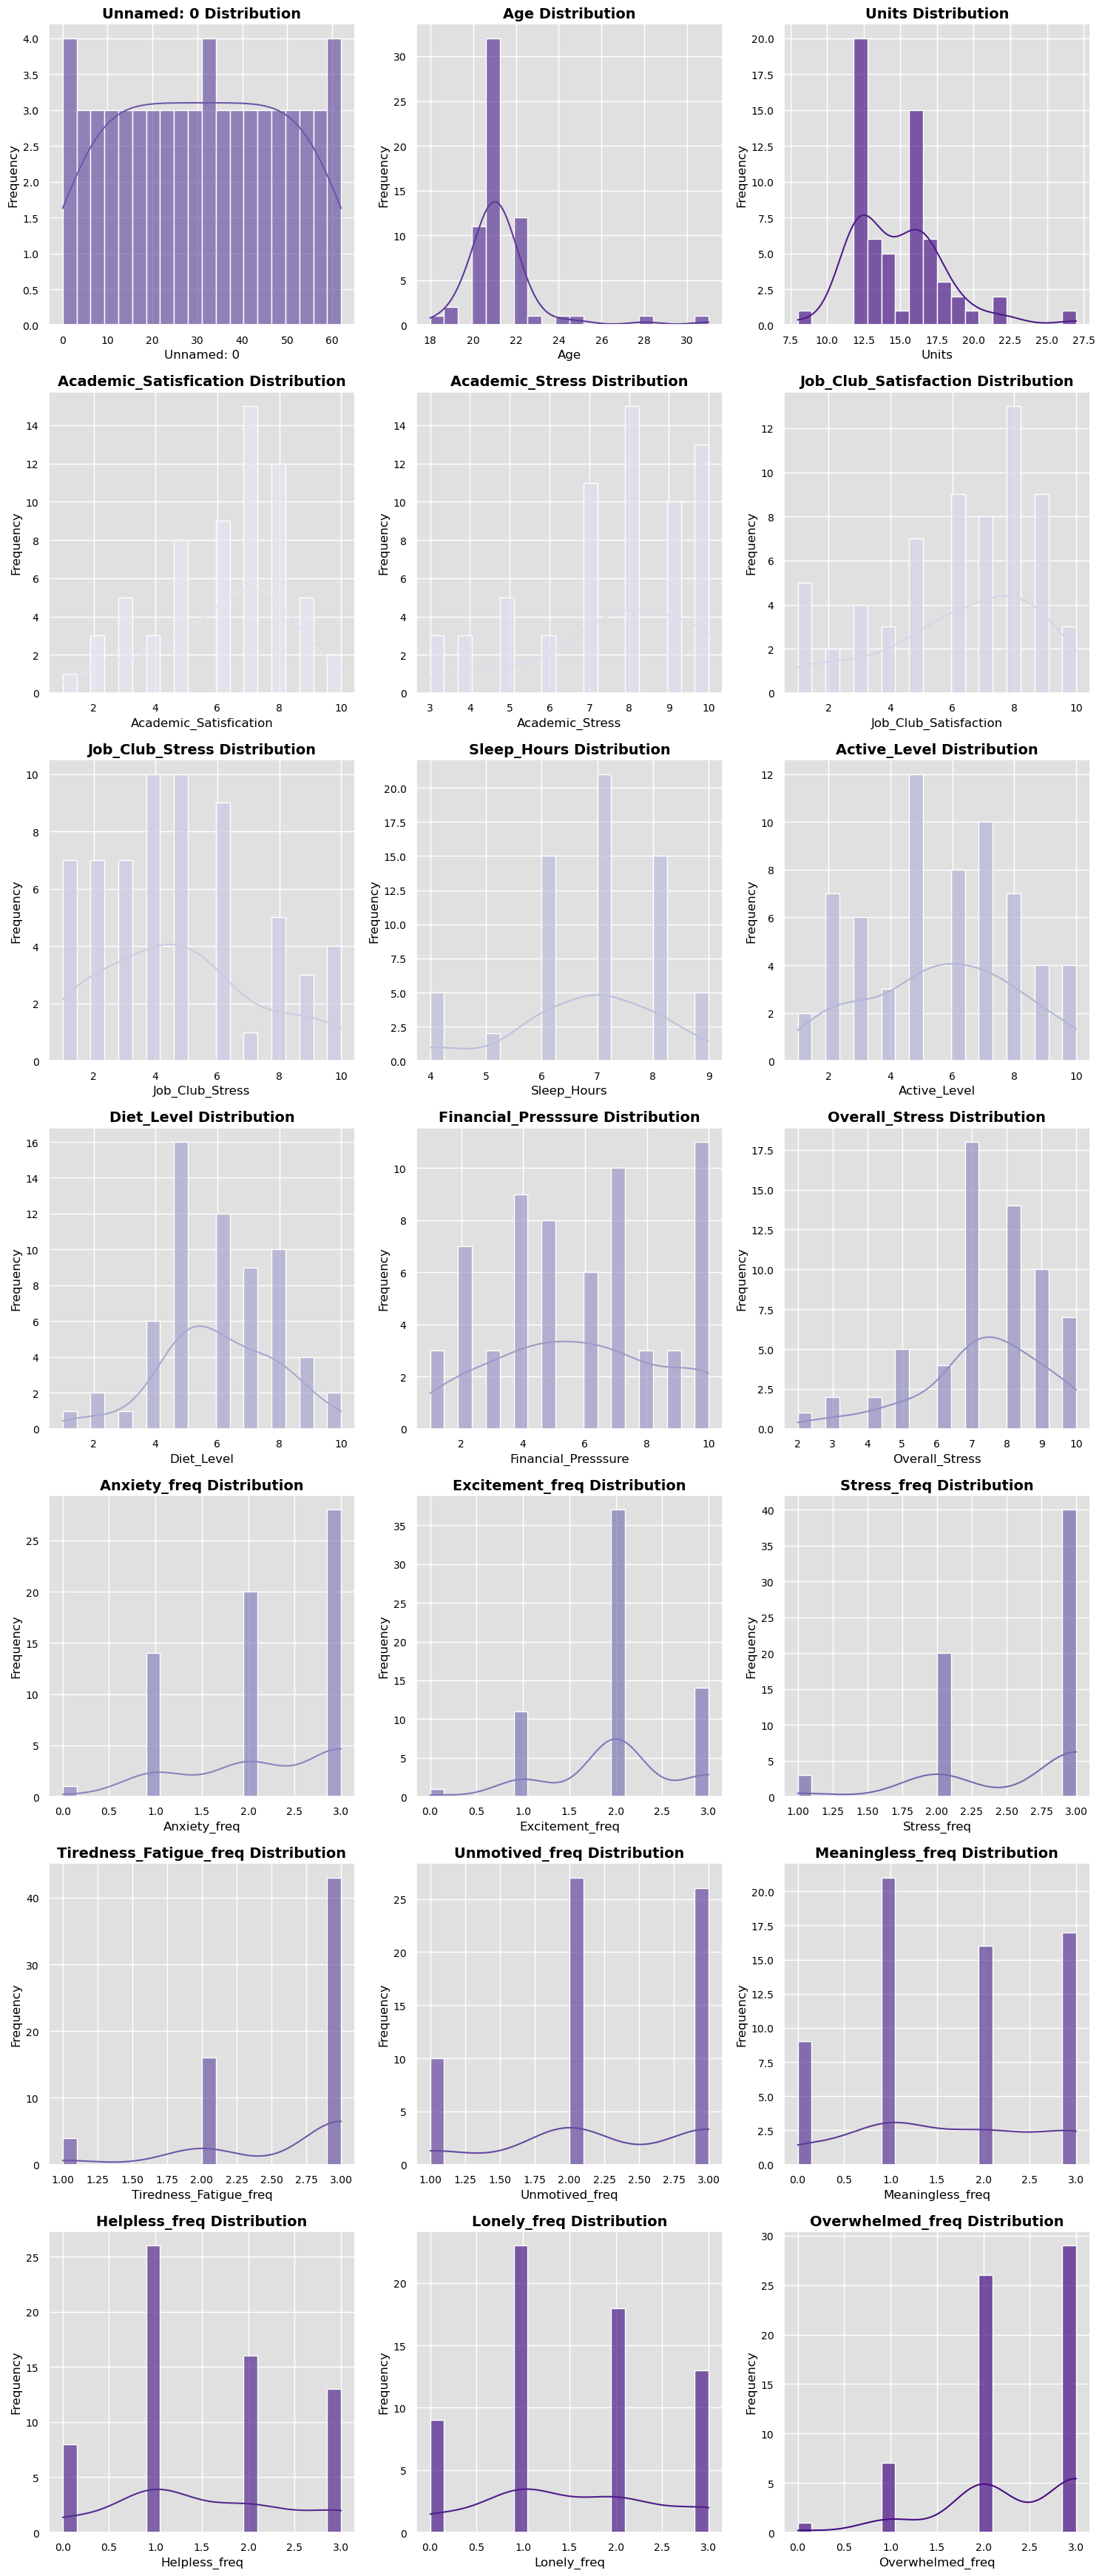

In [34]:
warnings.filterwarnings("ignore")
numerical_columns = main.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']

sns.set(style="darkgrid")

num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

colors = sns.color_palette("Purples", num_cols)

dark_colors = sns.color_palette("Purples", 10)[7:10]  
colors[:3] = dark_colors  

for i, col in enumerate(numerical_columns):
    sns.histplot(main[col], kde=True, bins=20, color=colors[i], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, color='black')
    axes[i].set_ylabel('Frequency', fontsize=12, color='black')
    axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[i].set_facecolor('#e0e0e0')  

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

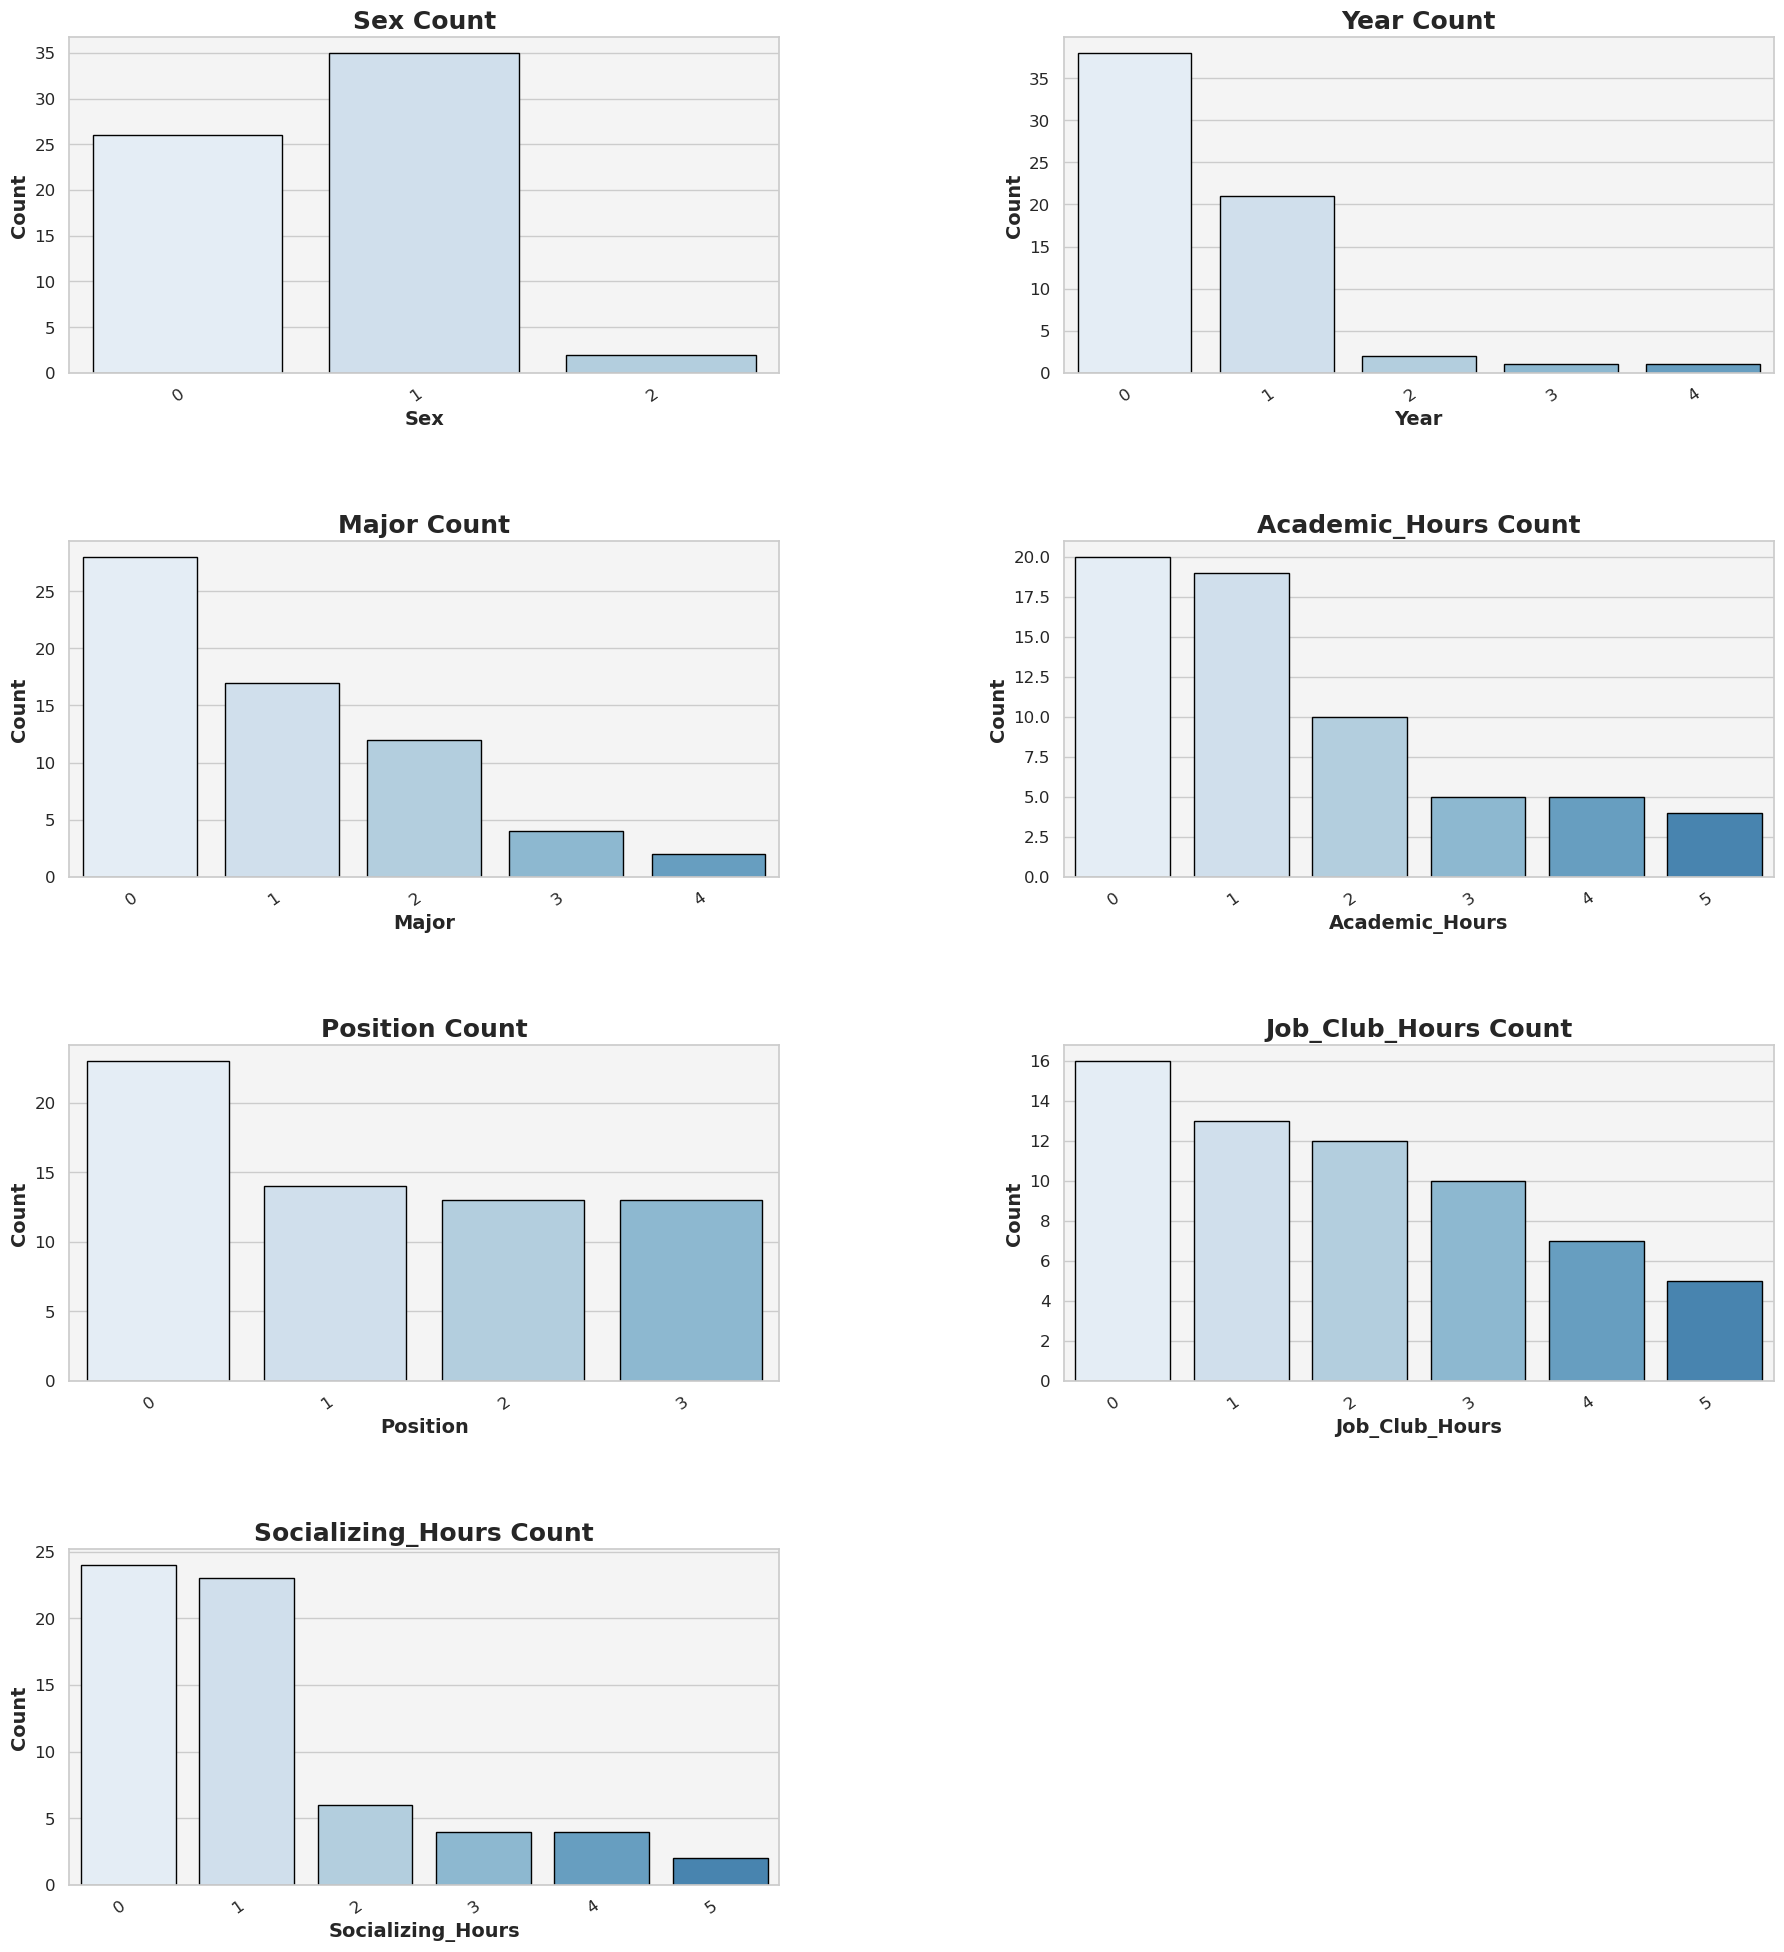

In [35]:
warnings.filterwarnings("ignore")

categorical_columns = main.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col.lower() != 'id']

sns.set(style="whitegrid")

num_cols = 2 
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, 6 * num_rows))
axes = axes.flatten()  

colors = sns.color_palette("Blues", n_colors=8)

for i, col in enumerate(categorical_columns):
    if col.lower() == 'city':
        sns.countplot(data=main, x=col, ax=axes[i], palette=colors, order=data[col].value_counts().iloc[:10].index)  # Top 10 cities only
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
    else:
        sns.countplot(data=main, x=col, ax=axes[i], palette=colors)
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')

    axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
    
    axes[i].tick_params(axis='x', rotation=35, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    for label in axes[i].get_xticklabels():
        label.set_horizontalalignment('right')


    for bar in axes[i].patches:
        bar.set_edgecolor('black')


    axes[i].set_facecolor('#f4f4f4')


for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])


plt.subplots_adjust(hspace=0.5, wspace=0.4)


plt.show

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(main, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.2631578947368421
Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.30      0.50      0.38         6
           8       0.25      0.50      0.33         2
           9       0.00      0.00      0.00         4
          10       1.00      0.25      0.40         4

    accuracy                           0.26        19
   macro avg       0.26      0.21      0.18        19
weighted avg       0.33      0.26      0.24        19



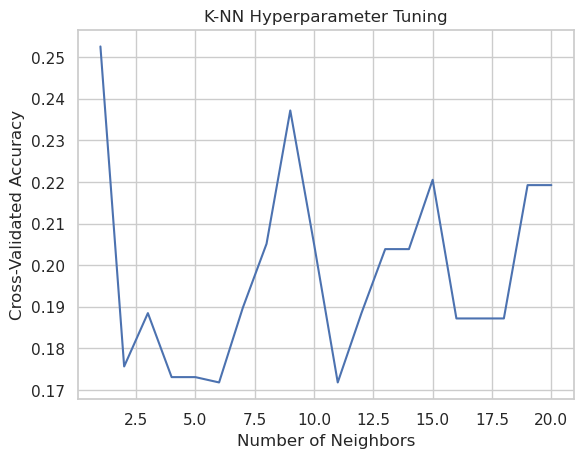

In [37]:
from sklearn.model_selection import cross_val_score

neighbors = range(1, 21) 
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, main, y, cv=5)  
    cv_scores.append(scores.mean())

import matplotlib.pyplot as plt

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K-NN Hyperparameter Tuning')
plt.show()


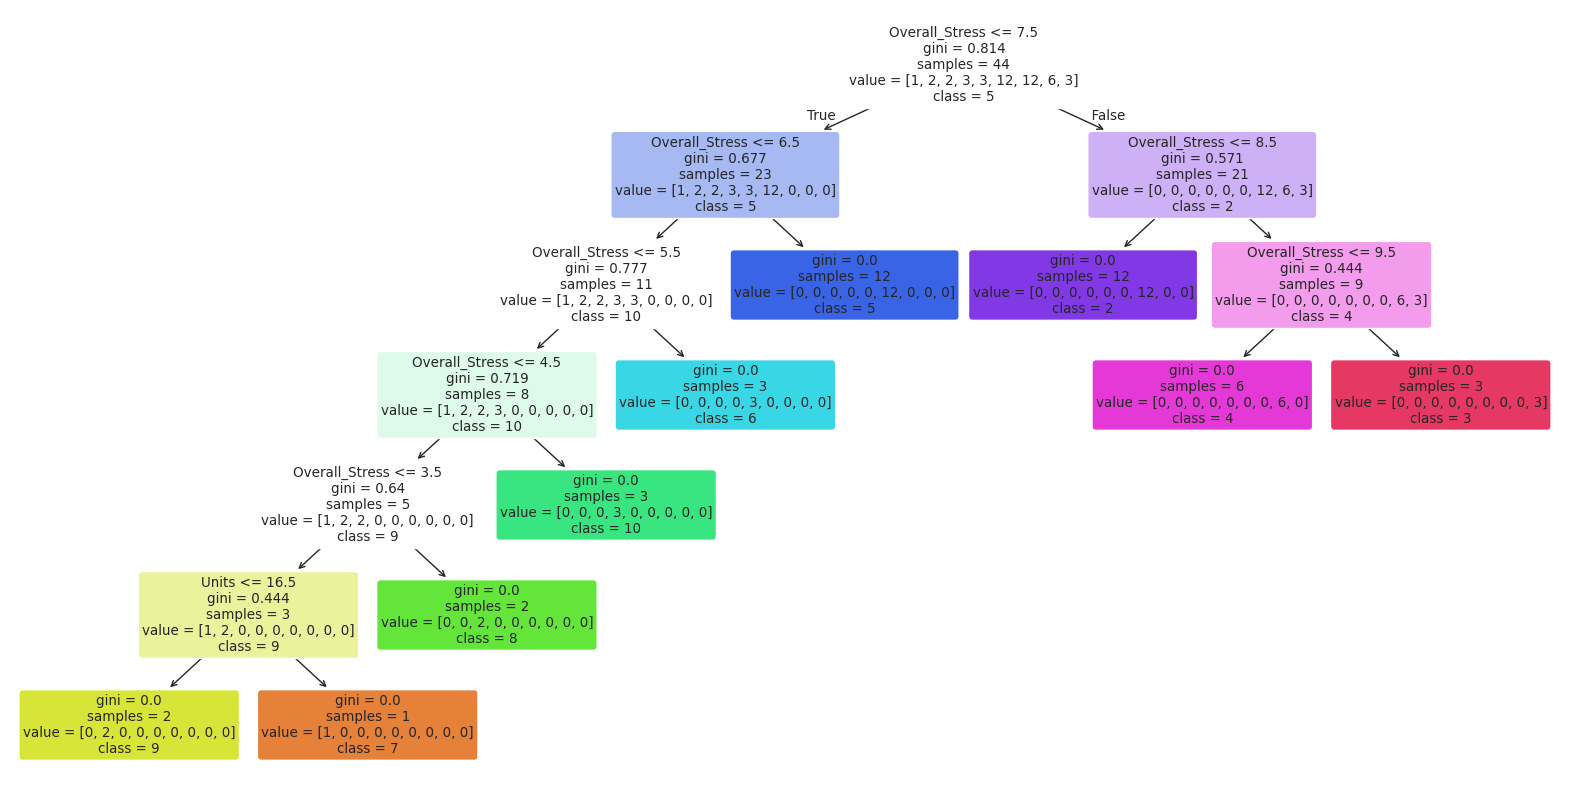

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  

feature_names = X_train.columns  

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=feature_names, class_names=y_train.unique().astype(str), rounded=True)
plt.show()